In [1]:
import pandas as pd

In [16]:
# USA Job Data

In [2]:
usa = pd.read_csv('linkedin-jobs-usa.csv')

In [3]:
usa_df = pd.DataFrame(usa)

In [4]:
sorted_usa = usa_df.sort_values('posted_date')

In [9]:
sorted_usa['origin'] = 'usa'

In [10]:
cleaned_usa = sorted_usa[['posted_date', 'onsite_remote', 'location', 'origin']]

In [14]:
final_usa = cleaned_usa.drop_duplicates()

In [15]:
print(final_usa.head())

     posted_date onsite_remote                   location origin
2344  2022-08-12        hybrid         Woodcliff Lake, NJ    usa
2336  2022-10-04        hybrid           Eden Prairie, MN    usa
2335  2022-10-13        hybrid          San Francisco, CA    usa
2405  2022-10-18        hybrid  Atlanta Metropolitan Area    usa
2531  2022-10-20        hybrid                 Dublin, OH    usa


In [17]:
# Africa Job Data

In [18]:
africa = pd.read_csv('linkedin-jobs-africa.csv')

In [19]:
africa_df = pd.DataFrame(africa)

In [20]:
sorted_africa = africa_df.sort_values('posted_date')

In [21]:
sorted_africa['origin'] = 'africa'

In [22]:
cleaned_africa = sorted_africa[['posted_date', 'onsite_remote', 'location', 'origin']]

In [23]:
print(cleaned_africa.head())

    posted_date onsite_remote             location  origin
211  2022-08-28        onsite                Ghana  africa
260  2022-08-28        onsite                Ghana  africa
36   2022-08-28        onsite                Ghana  africa
305  2022-09-18        onsite  Cairo, Cairo, Egypt  africa
905  2022-09-18        onsite  Cairo, Cairo, Egypt  africa


In [27]:
final_africa = cleaned_africa.drop_duplicates()

In [28]:
print(final_usa.shape)

(194, 4)


In [29]:
print(final_africa.shape)

(113, 4)


In [30]:
# merge dataframes

In [31]:
merged_africa_usa = pd.concat([final_usa, final_africa], axis=0)

In [32]:
print(merged_africa_usa)

     posted_date onsite_remote                             location  origin
2344  2022-08-12        hybrid                   Woodcliff Lake, NJ     usa
2336  2022-10-04        hybrid                     Eden Prairie, MN     usa
2335  2022-10-13        hybrid                    San Francisco, CA     usa
2405  2022-10-18        hybrid            Atlanta Metropolitan Area     usa
2531  2022-10-20        hybrid                           Dublin, OH     usa
...          ...           ...                                  ...     ...
1407  2022-11-23        remote   Accra, Greater Accra Region, Ghana  africa
13    2022-11-23        onsite              Sousse, Sousse, Tunisia  africa
7     2022-11-23        onsite         Dakar, Dakar Region, Senegal  africa
249   2022-11-23        onsite  Johannesburg, Gauteng, South Africa  africa
210   2022-11-23        onsite                                Egypt  africa

[307 rows x 4 columns]


In [58]:
# Conditional statements, looping, groupby

In [54]:
remote_count = 0
usa_count = 0
africa_count = 0

for index, row in merged_africa_usa.iterrows():
    if 'remote' in row['onsite_remote']:
        remote_count += 1
        if row['origin'] == 'usa':
            usa_count += 1
        elif row['origin'] == 'africa':
            africa_count += 1


In [55]:
print("Number of occurrences of 'remote' in 'onsite_remote' column:", remote_count)
print("Number of occurrences of 'usa' in 'remote_origins' column:", usa_count)
print("Number of occurrences of 'africa' in 'remote_origins' column:", africa_count)

Number of occurrences of 'remote' in 'onsite_remote' column: 90
Number of occurrences of 'usa' in 'remote_origins' column: 65
Number of occurrences of 'africa' in 'remote_origins' column: 25


In [80]:
hybrid_count = 0
usa_count = 0
africa_count = 0

for index, row in merged_africa_usa.iterrows():
    if row['onsite_remote'] == 'hybrid':
        hybrid_count += 1
        if row['origin'] == 'usa':
            usa_count += 1
        elif row['origin'] == 'africa':
            africa_count += 1


In [81]:
print("Number of occurrences of 'hybrid' in 'onsite_remote' column:", remote_count)
print("Number of occurrences of 'usa' in 'hybrid_origins' column:", usa_count)
print("Number of occurrences of 'africa' in 'hybrid_origins' column:", africa_count)

Number of occurrences of 'hybrid' in 'onsite_remote' column: 90
Number of occurrences of 'usa' in 'hybrid_origins' column: 74
Number of occurrences of 'africa' in 'hybrid_origins' column: 30


In [83]:
onsite_count = 0
usa_count = 0
africa_count = 0

for index, row in merged_africa_usa.iterrows():
    if 'onsite' in row['onsite_remote']:
        onsite_count += 1
        if row['origin'] == 'usa':
            usa_count += 1
        elif row['origin'] == 'africa':
            africa_count += 1

In [84]:
print("Number of occurrences of 'onsite' in 'onsite_remote' column:", remote_count)
print("Number of occurrences of 'usa' in 'onsite_origins' column:", usa_count)
print("Number of occurrences of 'africa' in 'onsite_origins' column:", africa_count)

Number of occurrences of 'onsite' in 'onsite_remote' column: 90
Number of occurrences of 'usa' in 'onsite_origins' column: 55
Number of occurrences of 'africa' in 'onsite_origins' column: 58


In [ ]:
# Define a custom function to create reusable code

In [56]:
def count_occurrences(dataframe):
    remote_count = 0
    usa_count = 0
    africa_count = 0

    for index, row in dataframe.iterrows():
        if 'remote' in row['onsite_remote']:
            remote_count += 1
            if row['origin'] == 'usa':
                usa_count += 1
            elif row['origin'] == 'africa':
                africa_count += 1

    return remote_count, usa_count, africa_count

In [57]:
counts = count_occurrences(merged_africa_usa)

remote_count = counts[0]
usa_count = counts[1]
africa_count = counts[2]

print("Number of occurrences of 'remote' in 'onsite_remote' column:", remote_count)
print("Number of occurrences of 'usa' in 'remote_origins' column:", usa_count)
print("Number of occurrences of 'africa' in 'remote_origins' column:", africa_count)

Number of occurrences of 'remote' in 'onsite_remote' column: 90
Number of occurrences of 'usa' in 'remote_origins' column: 65
Number of occurrences of 'africa' in 'remote_origins' column: 25


In [ ]:
# Use NumPy functions

In [61]:
import numpy as np 

In [62]:
def calculate_remote_percentage(dataframe):
    total_jobs = len(dataframe)  
    remote_jobs = np.sum(dataframe['onsite_remote'].str.contains('remote')) 

    remote_percentage = (remote_jobs / total_jobs) * 100

    return remote_percentage

percentage = calculate_remote_percentage(merged_africa_usa)

print("Percentage of remote jobs in the 'onsite_remote' column:", percentage)

Percentage of remote jobs in the 'onsite_remote' column: 29.31596091205212


In [63]:
# Visualisation

In [64]:
import matplotlib.pyplot as plt

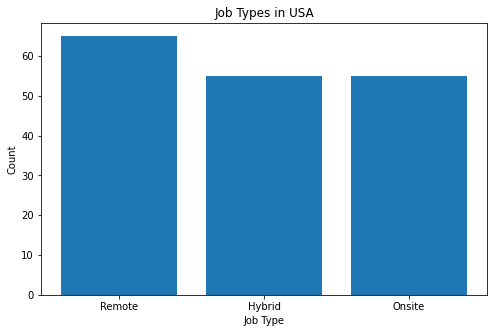

In [75]:
remote_count_usa = 65
hybrid_count_usa = 74
onsite_count_usa = 55
            
labels_usa = ['Remote', 'Hybrid', 'Onsite']
counts_usa = [remote_count_usa, hybrid_count_usa, onsite_count_usa]

plt.figure(figsize=(8, 5))
plt.bar(labels_usa, counts_usa)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Job Types in USA')
plt.show()

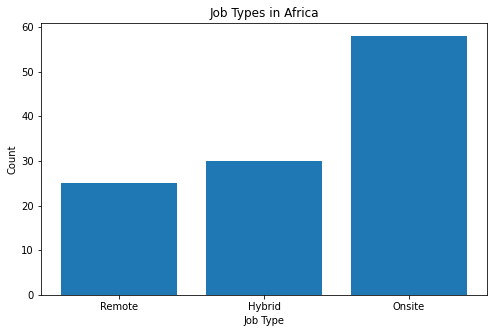

In [85]:
remote_count_africa = 25
hybrid_count_africa = 30
onsite_count_africa = 58
            
labels_africa = ['Remote', 'Hybrid', 'Onsite']
counts_africa = [remote_count_africa, hybrid_count_africa, onsite_count_africa]

plt.figure(figsize=(8, 5))
plt.bar(labels_africa, counts_africa)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Job Types in Africa')
plt.show()

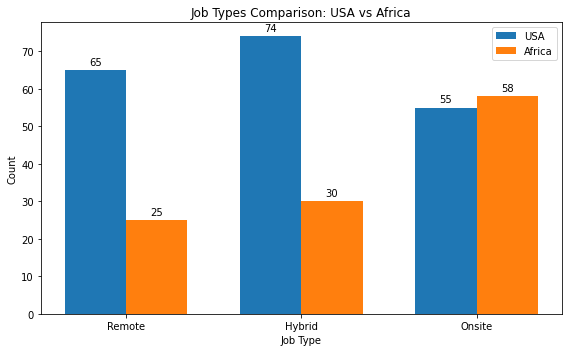

In [86]:
remote_count_usa = 65
hybrid_count_usa = 74
onsite_count_usa = 55

remote_count_africa = 25
hybrid_count_africa = 30
onsite_count_africa = 58

labels = ['Remote', 'Hybrid', 'Onsite']

heights_usa = [remote_count_usa, hybrid_count_usa, onsite_count_usa]
heights_africa = [remote_count_africa, hybrid_count_africa, onsite_count_africa]

positions = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

rects_usa = ax.bar(positions - width/2, heights_usa, width, label='USA')

rects_africa = ax.bar(positions + width/2, heights_africa, width, label='Africa')

ax.set_xlabel('Job Type')
ax.set_ylabel('Count')
ax.set_title('Job Types Comparison: USA vs Africa')
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects_usa)
autolabel(rects_africa)

plt.tight_layout()
plt.show()

In [87]:
# Insights
# 1. Out of 113 jobs posted in Africa for Data Analysts, 25 were remote, 30 were hybrid and 58 were onsite (shown in the orange bars).
# 2. Out of 194 jobs posted in USA for Data Analysts, 65 were remote, 74 were hybrid and 55 were onsite (shown in the blue bars). 
# 3. The USA offers more remote opportunities for data analysts on average.
# 4. The USA offers more hybrid opportunities for data analysts on average.
# 5. Africa has a bigger requirement for data analysts to work onsite on average.

In [88]:
# Machine Learning
# One way to use machine learning to make predictions, could be to predict demand for the different job types in the future. Machine learning could be used to estimate the expected number of positions posted and the volume of specific job types. 
# Predicting values continuously would be best performed using regression methods.